# Advertise Click: Logistic Regression Project 

In this project we will be working with advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv(r"G:\Data Science Eduminds\Assignments\Machine Learning\Logistic Regression\Advertising\advertising.csv")

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [13]:
ad_data.shape

(1000, 10)

In [14]:
ad_data.duplicated().sum()

0

In [15]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [38]:
ad_data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

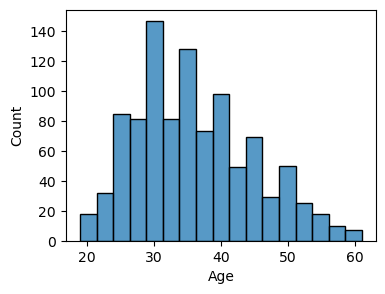

In [6]:
plt.figure(figsize=[4,3])
sns.histplot(data = ad_data, x='Age', shrink=1)
plt.show()

**Create a jointplot showing Area Income versus Age.**

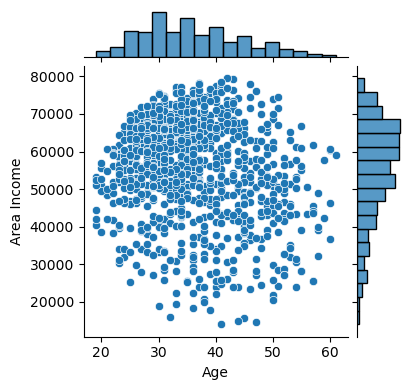

In [7]:
#plt.figure(figsize=[5,5])
sns.jointplot(data = ad_data, x= 'Age', y = 'Area Income', height = 4)
#plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

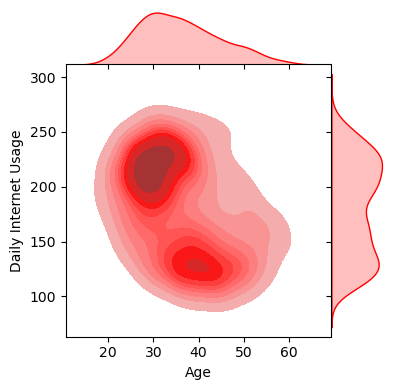

In [8]:
#plt.figure(figsize=[3,3])
sns.jointplot(data = ad_data, x= 'Age', y = 'Daily Internet Usage', kind = 'kde', color ='red', height = 4, space = 0, fill =True)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

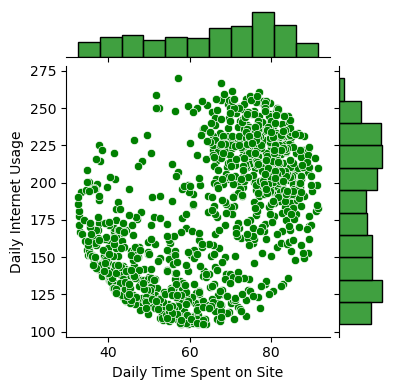

In [9]:
sns.jointplot(data=ad_data, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', color='green', height=4)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

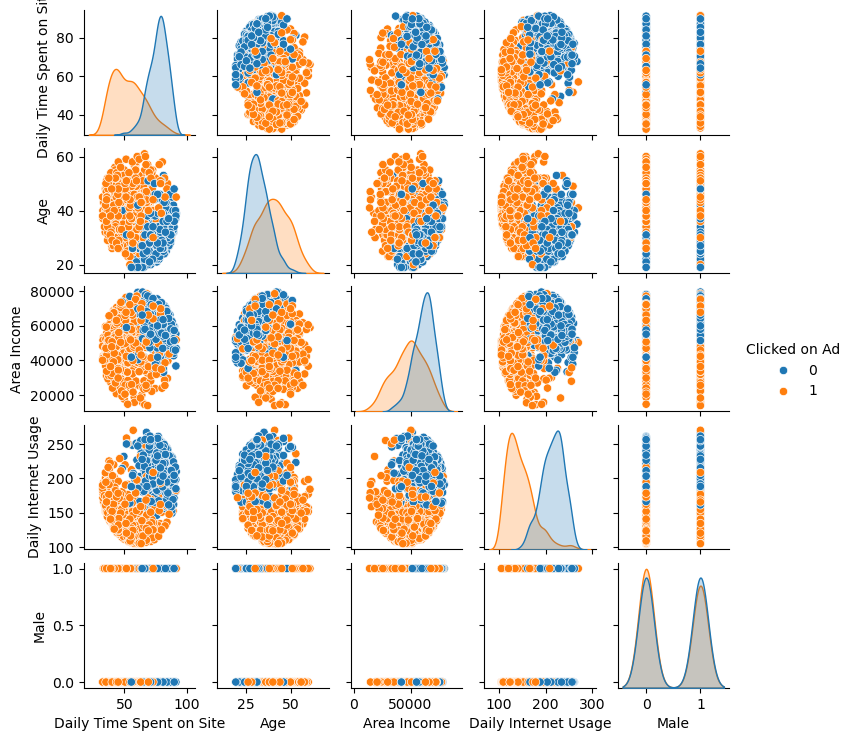

In [10]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', height=1.5)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [12]:
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0


In [16]:
# We can drop Ad Topic Line as it has 1000 unique values out of 1000 total values.
print('Unique values in Ad Topic Line column', len(ad_data['Ad Topic Line'].value_counts()))
print('Missing values in Ad Topic Line column', ad_data['Ad Topic Line'].isnull().sum())

Unique values in Ad Topic Line column 1000
Missing values in Ad Topic Line column 0


In [17]:
# We can drop City as it has 969 unique values out of 1000 total values.
print('Unique values in City column', len(ad_data['City'].unique()))
print('Missing values in City column', ad_data['City'].isnull().sum())

Unique values in City column 969
Missing values in City column 0


In [18]:
# We can drop Country as it has 237 unique values out of 1000 total values.
print('Unique values in Country column', len(ad_data['Country'].value_counts()))
print('Missing values in Country column', ad_data['Country'].isnull().sum())

Unique values in Country column 237
Missing values in Country column 0


In [19]:
ad_data = ad_data.drop(columns = ['Ad Topic Line', 'City', 'Country'], axis = 1)

In [20]:
# Most important feature is Timestamp as it will help us to infer what time users are interrested in which ads.
# So, we may need to convert/extract Day, Month, Year and further HH, MM, SS from Timestamp feature.
# Once we are done with this, we'll plot all these with our target variable and see if they have significant difference.

# 1. Check the data type of the feature Timestamp:
print('Data type of Timestamp: ', ad_data['Timestamp'].dtype)
# 2. Convert it to datatime:
ad_data['Timestamp_en'] = pd.to_datetime(ad_data['Timestamp'], dayfirst=True)

Data type of Timestamp:  object


In [21]:
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Timestamp_en
0,68.95,35,61833.90,256.09,0,27-03-2016 00:53,0,2016-03-27 00:53:00
1,80.23,31,68441.85,193.77,1,04-04-2016 01:39,0,2016-04-04 01:39:00
2,69.47,26,59785.94,236.50,0,13-03-2016 20:35,0,2016-03-13 20:35:00


In [22]:
hour = ad_data['Timestamp_en'].dt.hour
day_of_week = ad_data['Timestamp_en'].dt.day_of_week
month = ad_data['Timestamp_en'].dt.month

# Depending on the graph of these three derived values with target we'll further add year if required.

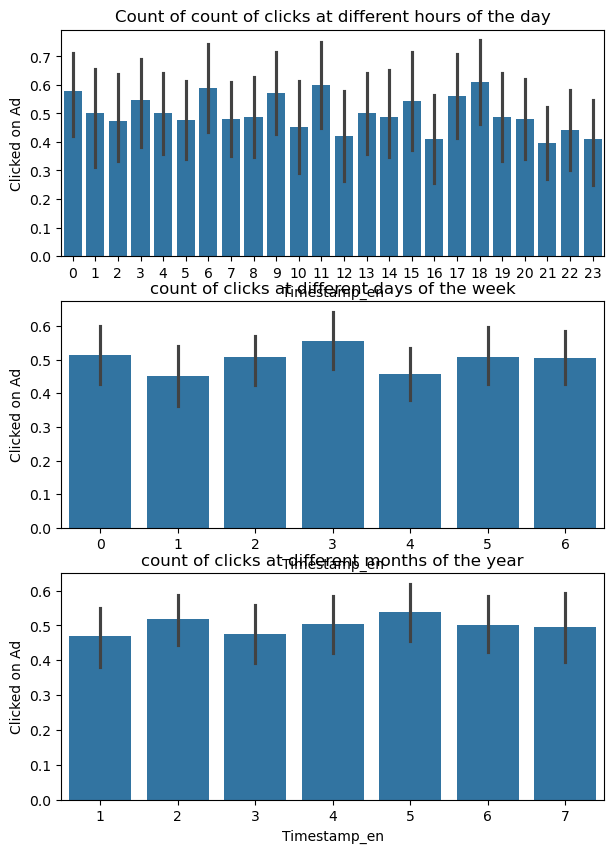

In [23]:
# Creating subplots
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

# Visualizing the count of clicks at different hours of the day
sns.barplot(x=hour, y=ad_data['Clicked on Ad'], ax=ax[0])
ax[0].set_title('Count of count of clicks at different hours of the day')

# Analyzing trends - Visualizing the count of bikes rented on different days of the week
sns.barplot(x=day_of_week, y=ad_data['Clicked on Ad'], ax=ax[1])
ax[1].set_title('count of clicks at different days of the week')

# Analyzing trends - Visualizing the count of bikes rented in different months of the year
sns.barplot(x=month, y=ad_data['Clicked on Ad'], ax=ax[2])
ax[2].set_title('count of clicks at different months of the year')

#plt.tight_layout()
plt.show()

In [24]:
# As we cann see there is no significant difference in average of hour/day_of_week/month wrt target.
# So, we can drop the Timestamp and Timestamp_en from dataframe. 

In [25]:
ad_data = ad_data.drop(columns=['Timestamp', 'Timestamp_en'], axis = 1)

In [26]:
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0


** Split the data into training set and testing set using train_test_split**

In [27]:
X = ad_data.drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [34]:
y_pred = log_reg.predict(X_test)

** Create a classification report for the model.**

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [36]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 83   6]
 [  5 106]]


In [37]:
# Accuracy = (True Positive + True Negative) / Total Predictions
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

# Precision = True Positive / (True Positive + False Positive)
print('Precision :', metrics.precision_score(y_test, y_pred))

# Sensitivity (Recall) = True Positive / (True Positive + False Negative)
print('Sensitivity (recall) :', metrics.recall_score(y_test, y_pred))

# Specificity = True Negative / (True Negative + False Positive)
print('Specificity :', metrics.recall_score(y_test, y_pred, pos_label=0))

# F-score = 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print('F1_score :', metrics.f1_score(y_test, y_pred))

Accuracy : 0.945
Precision : 0.9464285714285714
Sensitivity (recall) : 0.954954954954955
Specificity : 0.9325842696629213
F1_score : 0.9506726457399103
